In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error
from lstm import generate_data, lstm_model
from tensorflow.python.framework import dtypes
from tensorflow.contrib import learn

In [2]:
# MSE: 0.025567
# LOG_DIR = './ops_logs/all_points_model'
# TIMESTEPS = 5
# RNN_LAYERS = [{'num_units': 5}, {'num_units': 2}]
# DENSE_LAYERS = None
# TRAINING_STEPS = 10000
# PRINT_STEPS = TRAINING_STEPS / 10
# BATCH_SIZE = 100

# MSE: 0.023529
# LOG_DIR = './ops_logs/all_points_model'
# TIMESTEPS = 5
# RNN_LAYERS = [{'num_units': 5}, {'num_units': 2}]
# DENSE_LAYERS = [10]
# TRAINING_STEPS = 10000
# PRINT_STEPS = TRAINING_STEPS / 10
# BATCH_SIZE = 100


# MSE: 0.017626
# LOG_DIR = './ops_logs/all_points_model'
# TIMESTEPS = 5
# RNN_LAYERS = [{'num_units': 20}, {'num_units': 10}]
# DENSE_LAYERS = [10]
# TRAINING_STEPS = 10000
# PRINT_STEPS = TRAINING_STEPS / 10
# BATCH_SIZE = 100

# MSE: 0.017169
# LOG_DIR = './ops_logs/all_points_model'
# TIMESTEPS = 5
# RNN_LAYERS = [{'num_units': 40}, {'num_units': 20}]
# DENSE_LAYERS = [10]
# TRAINING_STEPS = 10000
# PRINT_STEPS = TRAINING_STEPS / 10
# BATCH_SIZE = 100

# MSE: 0.017812
# LOG_DIR = './ops_logs/all_points_model'
# TIMESTEPS = 10
# RNN_LAYERS = [{'num_units': 40}, {'num_units': 20}]
# DENSE_LAYERS = [10]
# TRAINING_STEPS = 10000
# PRINT_STEPS = TRAINING_STEPS / 10
# BATCH_SIZE = 100

# MSE: 0.063678
# LOG_DIR = './ops_logs/all_points_model'
# TIMESTEPS = 10
# RNN_LAYERS = [{'num_units': 16}, {'num_units': 20}, {'num_units': 20}]
# DENSE_LAYERS = [2]
# TRAINING_STEPS = 10000
# PRINT_STEPS = TRAINING_STEPS / 10
# BATCH_SIZE = 100

# MSE: 0.043254
# LOG_DIR = './ops_logs/all_points_model'
# TIMESTEPS = 10
# RNN_LAYERS = [{'num_units': 16}, {'num_units': 40}, {'num_units': 40}, {'num_units': 40}, {'num_units': 40}]
# DENSE_LAYERS = [10]
# TRAINING_STEPS = 10000
# PRINT_STEPS = TRAINING_STEPS / 10
# BATCH_SIZE = 100

# MSE: 0.043254
# LOG_DIR = './ops_logs/all_points_model'
# TIMESTEPS = 10
# RNN_LAYERS = [{'num_units': 16}, {'num_units': 40}, {'num_units': 40}, {'num_units': 40}, {'num_units': 40}]
# DENSE_LAYERS = [10]
# TRAINING_STEPS = 20000
# PRINT_STEPS = TRAINING_STEPS / 10
# BATCH_SIZE = 100

# MSE: 0.064110
# LOG_DIR = './ops_logs/all_points_model'
# TIMESTEPS = 10
# RNN_LAYERS = [{'num_units': 16}, {'num_units': 40}, {'num_units': 40}, {'num_units': 40}, {'num_units': 40}]
# DENSE_LAYERS = [2]
# TRAINING_STEPS = 10000
# PRINT_STEPS = TRAINING_STEPS / 10
# BATCH_SIZE = 100

# MSE: 0.020523
LOG_DIR = './ops_logs/all_points_model'
TIMESTEPS = 10
RNN_LAYERS = [{'num_units': 40}, {'num_units': 40}, {'num_units': 40}]
DENSE_LAYERS = [3]
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:
regressor = learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), model_dir=LOG_DIR)

In [4]:
X, y = generate_data(pd.read_csv('heatmap_data.csv'), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],every_n_steps=PRINT_STEPS,
                                                                                          early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], batch_size=BATCH_SIZE, steps=TRAINING_STEPS)

Instructions for updating:
Please use tf.contrib.layers.stack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.


Estimator(params=None)

In [8]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
Please use tf.contrib.layers.stack instead.


MSE: 0.020523


In [143]:
regressor.predict(X['test'][1:2,:,:])

Instructions for updating:
Please use tf.contrib.layers.stack instead.


array([[ 1.02258945,  1.0117718 ,  1.00854492,  1.01138639,  1.00962758,
         1.01351476,  1.03372276,  0.99643773,  1.00922966,  1.05309463,
         1.04049051,  1.0130794 ,  1.00752115,  1.00329185,  1.04170561,
         1.03255641]], dtype=float32)

In [140]:
X['test'][1:2,:,:]

array([[[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.]]])

In [83]:
corrected_predictions = np.zeros(predicted.shape)

for i, time in enumerate(predicted):
    for j, point in enumerate(time):
        if point <=1.06:
            corrected_predictions[i,j] = 1.0
        else:
            corrected_predictions[i,j] = point

In [84]:
new_rmse = np.sqrt(((corrected_predictions - y['test']) ** 2).mean(axis=0))
new_score = mean_squared_error(corrected_predictions, y['test'])
print ("NEW MSE: %f" % new_score)

NEW MSE: 0.019953


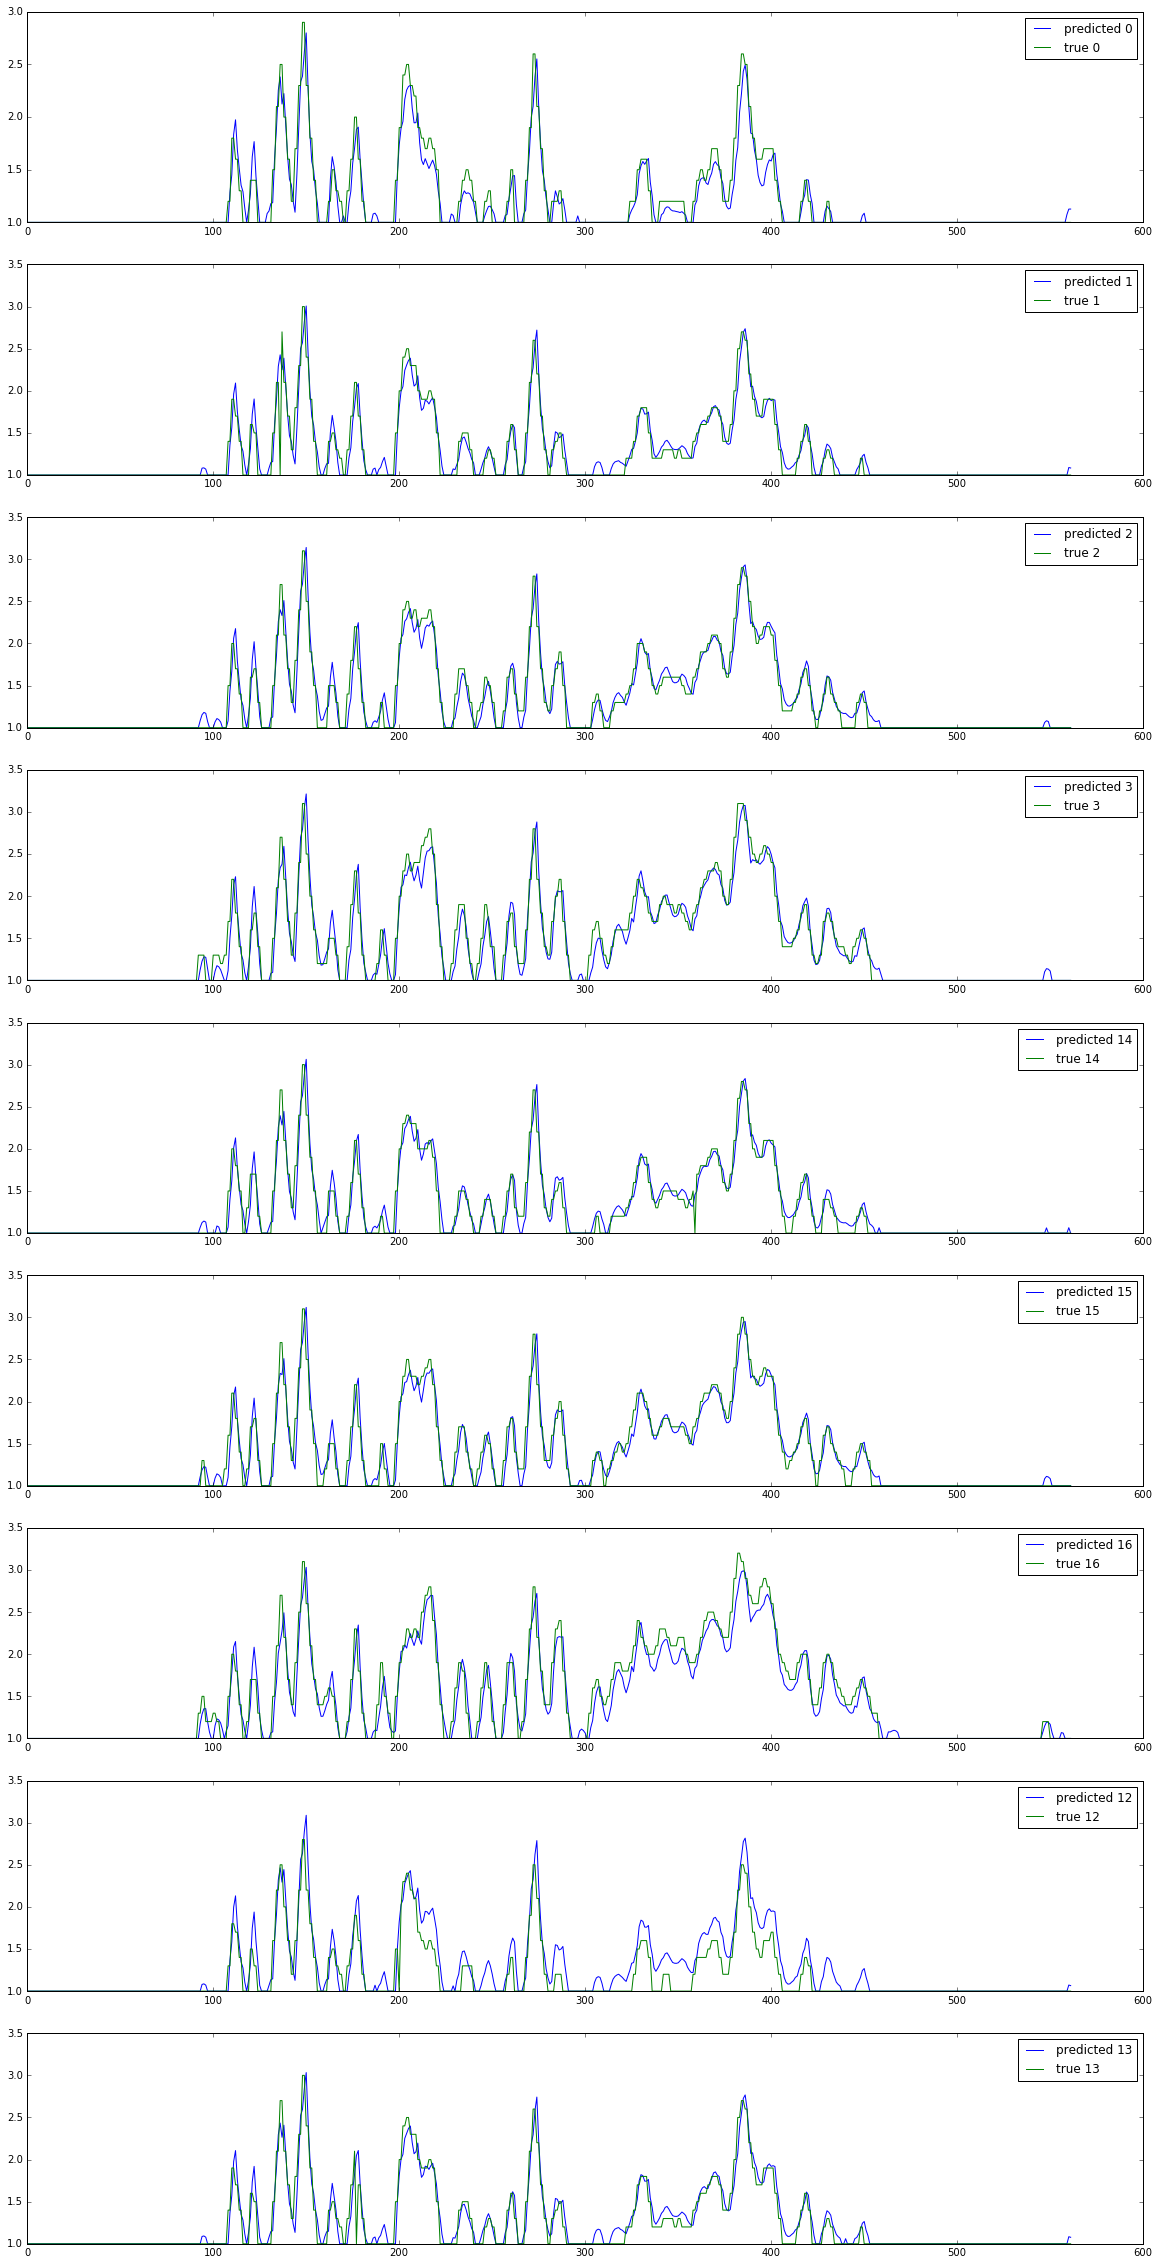

In [85]:
#[0, 1, 2, 3, 14, 15, 16, 12, 13
plt.figure(figsize=(20,40))

plt.subplot(911)
plt.plot(corrected_predictions[:,0],label='predicted 0')
plt.plot(y['test'][:,0],label='true 0')
plt.legend()

plt.subplot(912)
plt.plot(corrected_predictions[:,1],label='predicted 1')
plt.plot(y['test'][:,1],label='true 1')
plt.legend()

plt.subplot(913)
plt.plot(corrected_predictions[:,2],label='predicted 2')
plt.plot(y['test'][:,2],label='true 2')
plt.legend()

plt.subplot(914)
plt.plot(corrected_predictions[:,3],label='predicted 3')
plt.plot(y['test'][:,3],label='true 3')
plt.legend()

plt.subplot(915)
plt.plot(corrected_predictions[:,4],label='predicted 14')
plt.plot(y['test'][:,4],label='true 14')
plt.legend()

plt.subplot(916)
plt.plot(corrected_predictions[:,5],label='predicted 15')
plt.plot(y['test'][:,5],label='true 15')
plt.legend()

plt.subplot(917)
plt.plot(corrected_predictions[:,6],label='predicted 16')
plt.plot(y['test'][:,6],label='true 16')
plt.legend()

plt.subplot(918)
plt.plot(corrected_predictions[:,7],label='predicted 12')
plt.plot(y['test'][:,7],label='true 12')
plt.legend()

plt.subplot(919)
plt.plot(corrected_predictions[:,8],label='predicted 13')
plt.plot(y['test'][:,8],label='true 13')
plt.legend()

plt.show()

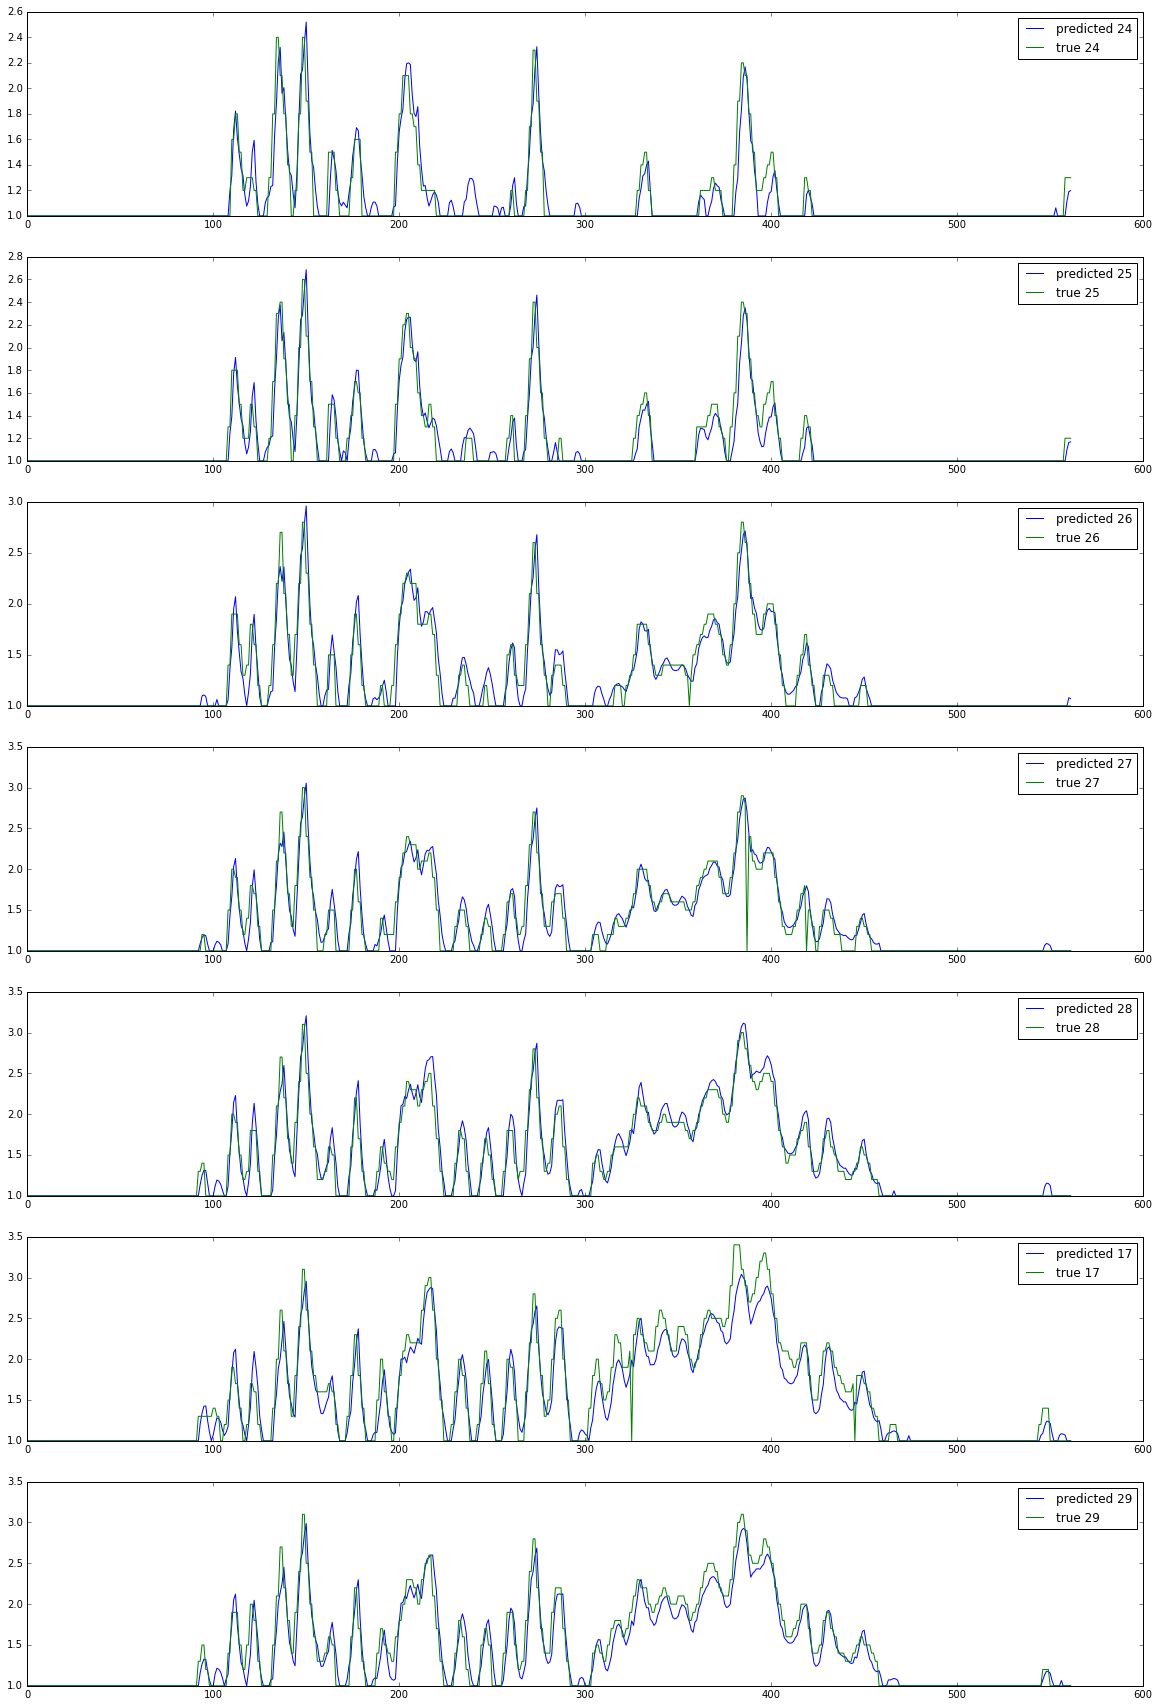

In [86]:
# , 24, 25, 26, 27, 28, 17, 29]
plt.figure(figsize=(20,30))

plt.subplot(711)
plt.plot(corrected_predictions[:,9],label='predicted 24')
plt.plot(y['test'][:,9],label='true 24')
plt.legend()

plt.subplot(712)
plt.plot(corrected_predictions[:,10],label='predicted 25')
plt.plot(y['test'][:,10],label='true 25')
plt.legend()

plt.subplot(713)
plt.plot(corrected_predictions[:,11],label='predicted 26')
plt.plot(y['test'][:,11],label='true 26')
plt.legend()

plt.subplot(714)
plt.plot(corrected_predictions[:,12],label='predicted 27')
plt.plot(y['test'][:,12],label='true 27')
plt.legend()

plt.subplot(715)
plt.plot(corrected_predictions[:,13],label='predicted 28')
plt.plot(y['test'][:,13],label='true 28')
plt.legend()

plt.subplot(716)
plt.plot(corrected_predictions[:,14],label='predicted 17')
plt.plot(y['test'][:,14],label='true 17')
plt.legend()

plt.subplot(717)
plt.plot(corrected_predictions[:,15],label='predicted 29')
plt.plot(y['test'][:,15],label='true 29')
plt.legend()

plt.show()